# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.013396
b   -0.290171
c    0.123815
d   -0.525339
e    0.760858
dtype: float64
a         NaN
b   -0.580343
c    0.247630
d   -1.050677
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2021,11,22,12,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2021'
# or alternatively
date = '22/11/2021 12:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D') #'D' stands for day
print (days)

seconds = pd.date_range(date, periods=3600, freq='s') #'s' stands for second
print (seconds)


2021-11-22
2021-11-22 12:45:10.000015
22/11/2021 12:45:00
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-23 12:45:00',
               '2021-11-24 12:45:00', '2021-11-25 12:45:00',
               '2021-11-26 12:45:00', '2021-11-27 12:45:00',
               '2021-11-28 12:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 12:45:01',
               '2021-11-22 12:45:02', '2021-11-22 12:45:03',
               '2021-11-22 12:45:04', '2021-11-22 12:45:05',
               '2021-11-22 12:45:06', '2021-11-22 12:45:07',
               '2021-11-22 12:45:08', '2021-11-22 12:45:09',
               ...
               '2021-11-22 13:44:50', '2021-11-22 13:44:51',
               '2021-11-22 13:44:52', '2021-11-22 13:44:53',
               '2021-11-22 13:44:54', '2021-11-22 13:44:55',
               '2021-11-22 13:44:56', '2021-11-22 13:44:57',
               '2021-11-22 13:44:58', '2021-11-22 13:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [7]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2021-11-22':'2021-11-23'], '\n') # Note - includes end time


2021-11-22 12:45:00     9.622771
2021-11-23 12:45:00    10.092153
2021-11-24 12:45:00    10.077226
2021-11-25 12:45:00     9.518805
Freq: D, dtype: float64 

2021-11-22 12:45:00     9.622771
2021-11-23 12:45:00    10.092153
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [3]:
entries=10
dates=pd.date_range('11/22/2021 12:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2021-11-22 12:45:00,-1.208230,-0.381399,-0.835575,-0.027041
2021-11-22 13:45:00,-1.951633,1.556186,-0.449077,0.018014
2021-11-22 14:45:00,-0.618654,0.319300,0.868012,-0.799443
2021-11-22 15:45:00,-0.396722,0.109543,0.475108,-1.794581
2021-11-22 16:45:00,0.457814,-1.316806,0.860227,1.190898
2021-11-22 17:45:00,-0.566949,0.330605,-0.306798,-1.692078
2021-11-22 18:45:00,-0.407332,0.566810,-0.900381,2.029081
2021-11-22 19:45:00,0.139395,-1.235314,-0.885307,1.899487
2021-11-22 20:45:00,-0.518570,1.146944,0.263086,-0.279158
2021-11-22 21:45:00,-0.951418,-0.115191,-0.261104,-0.017195


or by means of a dictionary:


In [4]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts -> it get an error because i'm requesting a new line but pandas doesn't know how to expand lines

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [5]:
df.head(2) #first two

,A,B,C,D
2021-11-22 12:45:00,-1.208230,-0.381399,-0.835575,-0.027041
2021-11-22 13:45:00,-1.951633,1.556186,-0.449077,0.018014


In [6]:
df.tail(4) #last four

,A,B,C,D
2021-11-22 18:45:00,-0.407332,0.566810,-0.900381,2.029081
2021-11-22 19:45:00,0.139395,-1.235314,-0.885307,1.899487
2021-11-22 20:45:00,-0.518570,1.146944,0.263086,-0.279158
2021-11-22 21:45:00,-0.951418,-0.115191,-0.261104,-0.017195


In [7]:
df.index

DatetimeIndex(['2021-11-22 12:45:00', '2021-11-22 13:45:00',
               '2021-11-22 14:45:00', '2021-11-22 15:45:00',
               '2021-11-22 16:45:00', '2021-11-22 17:45:00',
               '2021-11-22 18:45:00', '2021-11-22 19:45:00',
               '2021-11-22 20:45:00', '2021-11-22 21:45:00'],
              dtype='datetime64[ns]', freq='H')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [9]:
df.values

array([[-1.20823029, -0.38139873, -0.83557528, -0.02704054],
       [-1.9516328 ,  1.55618564, -0.44907655,  0.01801406],
       [-0.61865425,  0.31929977,  0.86801163, -0.79944277],
       [-0.39672155,  0.10954256,  0.47510818, -1.79458103],
       [ 0.45781447, -1.3168057 ,  0.86022693,  1.19089834],
       [-0.56694902,  0.33060467, -0.30679752, -1.69207802],
       [-0.40733171,  0.56680973, -0.90038134,  2.02908143],
       [ 0.13939461, -1.23531415, -0.88530737,  1.89948651],
       [-0.51857001,  1.14694352,  0.26308645, -0.27915751],
       [-0.95141752, -0.11519111, -0.26110387, -0.01719473]])

In [10]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.602230,0.098068,-0.117181,0.052799
std,0.672680,0.919194,0.691831,1.329896
min,-1.951633,-1.316806,-0.900381,-1.794581
25%,-0.868227,-0.314847,-0.738951,-0.669371
50%,-0.542760,0.214421,-0.283951,-0.022118
75%,-0.399374,0.507758,0.422103,0.897677
max,0.457814,1.556186,0.868012,2.029081


In [11]:
df.T #transpose

,2021-11-22 12:45:00,2021-11-22 13:45:00,2021-11-22 14:45:00,2021-11-22 15:45:00,2021-11-22 16:45:00,2021-11-22 17:45:00,2021-11-22 18:45:00,2021-11-22 19:45:00,2021-11-22 20:45:00,2021-11-22 21:45:00
A,-1.208230,-1.951633,-0.618654,-0.396722,0.457814,-0.566949,-0.407332,0.139395,-0.518570,-0.951418
B,-0.381399,1.556186,0.319300,0.109543,-1.316806,0.330605,0.566810,-1.235314,1.146944,-0.115191
C,-0.835575,-0.449077,0.868012,0.475108,0.860227,-0.306798,-0.900381,-0.885307,0.263086,-0.261104
D,-0.027041,0.018014,-0.799443,-1.794581,1.190898,-1.692078,2.029081,1.899487,-0.279158,-0.017195


In [13]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2021-11-22 12:45:00,-1.208230,-0.381399,-0.835575,-0.027041
2021-11-22 13:45:00,-1.951633,1.556186,-0.449077,0.018014
2021-11-22 14:45:00,-0.618654,0.319300,0.868012,-0.799443
2021-11-22 15:45:00,-0.396722,0.109543,0.475108,-1.794581
2021-11-22 16:45:00,0.457814,-1.316806,0.860227,1.190898
2021-11-22 17:45:00,-0.566949,0.330605,-0.306798,-1.692078
2021-11-22 18:45:00,-0.407332,0.566810,-0.900381,2.029081
2021-11-22 19:45:00,0.139395,-1.235314,-0.885307,1.899487
2021-11-22 20:45:00,-0.518570,1.146944,0.263086,-0.279158
2021-11-22 21:45:00,-0.951418,-0.115191,-0.261104,-0.017195


In [20]:
df.sort_values(by="C")

,A,B,C,D
2021-11-22 19:45:00,1.548366,-1.948186,-1.340766,-0.266323
2021-11-22 16:45:00,-0.637597,1.042329,-1.158359,1.017031
2021-11-22 12:45:00,1.029041,-1.292724,-0.717616,0.418923
2021-11-22 20:45:00,-1.859326,-0.918139,-0.690938,-2.422034
2021-11-22 21:45:00,-0.381617,-0.603567,-0.321881,0.741971
2021-11-22 15:45:00,-0.940057,-0.352940,0.228861,0.198944
2021-11-22 13:45:00,-0.183202,-0.573787,0.320948,2.208244
2021-11-22 14:45:00,-0.252483,0.055509,0.815100,-0.995179
2021-11-22 17:45:00,-0.647398,-0.632081,1.263104,0.908998
2021-11-22 18:45:00,0.176381,0.985115,2.620154,1.062134


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [21]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2021-11-22 12:45:00    1.029041
2021-11-22 13:45:00   -0.183202
2021-11-22 14:45:00   -0.252483
2021-11-22 15:45:00   -0.940057
2021-11-22 16:45:00   -0.637597
2021-11-22 17:45:00   -0.647398
2021-11-22 18:45:00    0.176381
2021-11-22 19:45:00    1.548366
2021-11-22 20:45:00   -1.859326
2021-11-22 21:45:00   -0.381617
Freq: H, Name: A, dtype: float64 

2021-11-22 12:45:00    1.029041
2021-11-22 13:45:00   -0.183202
2021-11-22 14:45:00   -0.252483
2021-11-22 15:45:00   -0.940057
2021-11-22 16:45:00   -0.637597
2021-11-22 17:45:00   -0.647398
2021-11-22 18:45:00    0.176381
2021-11-22 19:45:00    1.548366
2021-11-22 20:45:00   -1.859326
2021-11-22 21:45:00   -0.381617
Freq: H, Name: A, dtype: float64


In [22]:
# selecting rows by counting
print (df[0:3]) #choosing from 0 to 2

# or by index
print (df["2021-11-22 12:45:00":"2021-11-22 14:45:00"]) #from the firs time to the second time (comprehended)

                            A         B         C         D
2021-11-22 12:45:00  1.029041 -1.292724 -0.717616  0.418923
2021-11-22 13:45:00 -0.183202 -0.573787  0.320948  2.208244
2021-11-22 14:45:00 -0.252483  0.055509  0.815100 -0.995179
                            A         B         C         D
2021-11-22 12:45:00  1.029041 -1.292724 -0.717616  0.418923
2021-11-22 13:45:00 -0.183202 -0.573787  0.320948  2.208244
2021-11-22 14:45:00 -0.252483  0.055509  0.815100 -0.995179


### Selection by label

In [23]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    1.029041
B   -1.292724
C   -0.717616
D    0.418923
Name: 2021-11-22 12:45:00, dtype: float64

In [ ]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']] #I want just these two columns
#a=df.loc[:,['A','B']]

In [ ]:
# showing label slicing, both endpoints are included:
df.loc['2021-11-22 16:45:00':'2021-11-22 18:45:00',['A','B']]

In [ ]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

### Selecting by position

In [ ]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

In [ ]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

In [ ]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


In [ ]:
# selecting an individual element by position
df.iloc[1,1]
df.iat[1,1]


### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [24]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2021-11-22 14:45:00,-0.252483,0.055509,0.815100,-0.995179
2021-11-22 16:45:00,-0.637597,1.042329,-1.158359,1.017031
2021-11-22 18:45:00,0.176381,0.985115,2.620154,1.062134


In [25]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2021-11-22 12:45:00,1.029041,NaN,NaN,0.418923
2021-11-22 13:45:00,NaN,NaN,0.320948,2.208244
2021-11-22 14:45:00,NaN,0.055509,0.815100,NaN
2021-11-22 15:45:00,NaN,NaN,0.228861,0.198944
2021-11-22 16:45:00,NaN,1.042329,NaN,1.017031
2021-11-22 17:45:00,NaN,NaN,1.263104,0.908998
2021-11-22 18:45:00,0.176381,0.985115,2.620154,1.062134
2021-11-22 19:45:00,1.548366,NaN,NaN,NaN
2021-11-22 20:45:00,NaN,NaN,NaN,NaN
2021-11-22 21:45:00,NaN,NaN,NaN,0.741971


### Setting

Combination of selection and setting of values

In [24]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [25]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-0.381399,-0.835575,5,0.0,0,1.000000
2021-11-22 13:45:00,-1.951633,1.556186,-0.449077,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.618654,0.319300,0.868012,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.396722,0.109543,0.475108,5,1.5,6,0.999657
2021-11-22 16:45:00,0.457814,-1.316806,0.860227,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.566949,0.330605,-0.306798,5,2.5,10,0.999048
2021-11-22 18:45:00,-0.407332,0.566810,-0.900381,5,3.0,12,0.998630
2021-11-22 19:45:00,0.139395,-1.235314,-0.885307,5,3.5,14,0.998135
2021-11-22 20:45:00,-0.518570,1.146944,0.263086,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.951418,-0.115191,-0.261104,5,4.5,18,0.996917


In [28]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.292724,-0.717616,-5,0.0,0,-1.000000
2021-11-22 13:45:00,-0.183202,-0.573787,-0.320948,-5,-0.5,-2,-0.999962
2021-11-22 14:45:00,-0.252483,-0.055509,-0.815100,-5,-1.0,-4,-0.999848
2021-11-22 15:45:00,-0.940057,-0.352940,-0.228861,-5,-1.5,-6,-0.999657
2021-11-22 16:45:00,-0.637597,-1.042329,-1.158359,-5,-2.0,-8,-0.999391
2021-11-22 17:45:00,-0.647398,-0.632081,-1.263104,-5,-2.5,-10,-0.999048
2021-11-22 18:45:00,-0.176381,-0.985115,-2.620154,-5,-3.0,-12,-0.998630
2021-11-22 19:45:00,-1.548366,-1.948186,-1.340766,-5,-3.5,-14,-0.998135
2021-11-22 20:45:00,-1.859326,-0.918139,-0.690938,-5,-4.0,-16,-0.997564
2021-11-22 21:45:00,-0.381617,-0.603567,-0.321881,-5,-4.5,-18,-0.996917


In [29]:
df

,A,B,C,D,E,E prime,cosine
2021-11-22 12:45:00,0.000000,-1.292724,-0.717616,5,0.0,0,1.000000
2021-11-22 13:45:00,-0.183202,-0.573787,0.320948,5,0.5,2,0.999962
2021-11-22 14:45:00,-0.252483,0.055509,0.815100,5,1.0,4,0.999848
2021-11-22 15:45:00,-0.940057,-0.352940,0.228861,5,1.5,6,0.999657
2021-11-22 16:45:00,-0.637597,1.042329,-1.158359,5,2.0,8,0.999391
2021-11-22 17:45:00,-0.647398,-0.632081,1.263104,5,2.5,10,0.999048
2021-11-22 18:45:00,0.176381,0.985115,2.620154,5,3.0,12,0.998630
2021-11-22 19:45:00,1.548366,-1.948186,-1.340766,5,3.5,14,0.998135
2021-11-22 20:45:00,-1.859326,-0.918139,-0.690938,5,4.0,16,0.997564
2021-11-22 21:45:00,-0.381617,-0.603567,-0.321881,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [30]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2021-11-22 12:45:00,0.000000,-1.292724,-0.717616,5,0.0,1.000000
2021-11-22 13:45:00,-0.183202,-0.573787,0.320948,5,0.5,0.999962
2021-11-22 14:45:00,-0.252483,0.055509,0.815100,5,1.0,0.999848
2021-11-22 15:45:00,-0.940057,-0.352940,0.228861,5,1.5,0.999657
2021-11-22 16:45:00,-0.637597,1.042329,-1.158359,5,2.0,0.999391
2021-11-22 17:45:00,-0.647398,-0.632081,1.263104,5,2.5,0.999048
2021-11-22 18:45:00,0.176381,0.985115,2.620154,5,3.0,0.998630
2021-11-22 19:45:00,1.548366,-1.948186,-1.340766,5,3.5,0.998135
2021-11-22 20:45:00,-1.859326,-0.918139,-0.690938,5,4.0,0.997564
2021-11-22 21:45:00,-0.381617,-0.603567,-0.321881,5,4.5,0.996917


In [ ]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

In [ ]:
df

In [ ]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2021-11-22 20:45:00"))

## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [ ]:
df_wNan = df[df>0]
df_wNan

In [ ]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

In [ ]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

In [ ]:
# filling missing data
df_wNan.fillna(value=0)

Fill gaps forward or backward by propagating non-NA values forward or backward:

In [ ]:
df_wNan.fillna(method='pad')

## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [15]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A   -0.602230
B    0.098068
C   -0.117181
D    0.052799
dtype: float64 

2021-11-22 12:45:00   -0.613061
2021-11-22 13:45:00   -0.206627
2021-11-22 14:45:00   -0.057696
2021-11-22 15:45:00   -0.401663
2021-11-22 16:45:00    0.298034
2021-11-22 17:45:00   -0.558805
2021-11-22 18:45:00    0.322045
2021-11-22 19:45:00   -0.020435
2021-11-22 20:45:00    0.153076
2021-11-22 21:45:00   -0.336227
Freq: H, dtype: float64 



In [16]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D
2021-11-22 12:45:00,-1.208230,-0.381399,-0.835575,-0.027041
2021-11-22 13:45:00,-3.159863,1.174787,-1.284652,-0.009026
2021-11-22 14:45:00,-3.778517,1.494087,-0.416640,-0.808469
2021-11-22 15:45:00,-4.175239,1.603629,0.058468,-2.603050
2021-11-22 16:45:00,-3.717424,0.286824,0.918695,-1.412152
2021-11-22 17:45:00,-4.284373,0.617428,0.611897,-3.104230
2021-11-22 18:45:00,-4.691705,1.184238,-0.288484,-1.075149
2021-11-22 19:45:00,-4.552311,-0.051076,-1.173791,0.824338
2021-11-22 20:45:00,-5.070881,1.095867,-0.910705,0.545180
2021-11-22 21:45:00,-6.022298,0.980676,-1.171809,0.527986


In [17]:
df

,A,B,C,D
2021-11-22 12:45:00,-1.208230,-0.381399,-0.835575,-0.027041
2021-11-22 13:45:00,-1.951633,1.556186,-0.449077,0.018014
2021-11-22 14:45:00,-0.618654,0.319300,0.868012,-0.799443
2021-11-22 15:45:00,-0.396722,0.109543,0.475108,-1.794581
2021-11-22 16:45:00,0.457814,-1.316806,0.860227,1.190898
2021-11-22 17:45:00,-0.566949,0.330605,-0.306798,-1.692078
2021-11-22 18:45:00,-0.407332,0.566810,-0.900381,2.029081
2021-11-22 19:45:00,0.139395,-1.235314,-0.885307,1.899487
2021-11-22 20:45:00,-0.518570,1.146944,0.263086,-0.279158
2021-11-22 21:45:00,-0.951418,-0.115191,-0.261104,-0.017195


In [18]:
df.apply(lambda x: x.max() - x.min())

A    2.409447
B    2.872991
C    1.768393
D    3.823662
dtype: float64

In [19]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2021-11-22 12:45:00   -1.589629
2021-11-22 13:45:00   -0.395447
2021-11-22 14:45:00   -0.299354
2021-11-22 15:45:00   -0.287179
2021-11-22 16:45:00   -0.858991
2021-11-22 17:45:00   -0.236344
2021-11-22 18:45:00    0.159478
2021-11-22 19:45:00   -1.095920
2021-11-22 20:45:00    0.628374
2021-11-22 21:45:00   -1.066609
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [21]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


Let's now do some operations among (elements of) columns

In [22]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [23]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [ ]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [31]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.026780,-1.318671,-1.201810,1.417532
1,0.192671,-0.776951,-1.859061,-1.577844
2,0.314387,-0.126176,1.933929,0.505013
3,0.514486,-0.577462,0.926585,0.740781
4,-0.958951,1.146045,-0.233772,0.438582
5,0.998935,-0.216173,0.344710,-0.968451
6,0.592419,-0.713344,-1.619646,0.364727
7,-0.500330,-0.655993,-0.556973,0.726620
8,0.198376,0.102785,1.087140,0.939393
9,-0.618449,0.489237,2.888314,1.513133


In [32]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.026780 -1.318671 -1.201810  1.417532
 1  0.192671 -0.776951 -1.859061 -1.577844
 2  0.314387 -0.126176  1.933929  0.505013,
           0         1         2         3
 3  0.514486 -0.577462  0.926585  0.740781
 4 -0.958951  1.146045 -0.233772  0.438582
 5  0.998935 -0.216173  0.344710 -0.968451
 6  0.592419 -0.713344 -1.619646  0.364727,
           0         1         2         3
 7 -0.500330 -0.655993 -0.556973  0.726620
 8  0.198376  0.102785  1.087140  0.939393
 9 -0.618449  0.489237  2.888314  1.513133]

In [33]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.026780,-1.318671,-1.201810,1.417532
1,0.192671,-0.776951,-1.859061,-1.577844
2,0.314387,-0.126176,1.933929,0.505013
3,0.514486,-0.577462,0.926585,0.740781
4,-0.958951,1.146045,-0.233772,0.438582
5,0.998935,-0.216173,0.344710,-0.968451
6,0.592419,-0.713344,-1.619646,0.364727
7,-0.500330,-0.655993,-0.556973,0.726620
8,0.198376,0.102785,1.087140,0.939393
9,-0.618449,0.489237,2.888314,1.513133


In [34]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)
rdf

,0,1,2,3
0,1.026780,-1.318671,-1.201810,1.417532
1,0.192671,-0.776951,-1.859061,-1.577844
2,0.314387,-0.126176,1.933929,0.505013
3,0.514486,-0.577462,0.926585,0.740781
4,-0.958951,1.146045,-0.233772,0.438582
5,0.998935,-0.216173,0.344710,-0.968451
6,0.592419,-0.713344,-1.619646,0.364727
7,-0.500330,-0.655993,-0.556973,0.726620
8,0.198376,0.102785,1.087140,0.939393
9,-0.618449,0.489237,2.888314,1.513133


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [14]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [3]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,1.763365,0.569749
1,bar,one,-1.095941,0.366268
2,foo,two,0.664634,0.092768
3,bar,three,0.154726,1.724649
4,foo,two,-0.151176,-0.381189
5,bar,two,-0.198231,-0.032097
6,foo,one,-1.051766,-1.640208
7,foo,three,-0.884324,-0.540169


In [4]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-1.139446,2.058820
foo,0.340733,-1.899049


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [ ]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


In [ ]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

In [ ]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

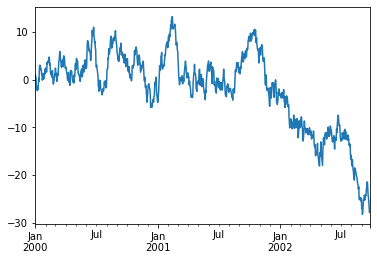

In [3]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

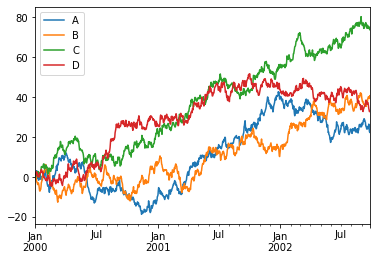

In [4]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')